In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import warnings

import allinone as aio  #fonsiyonların yer aldığı kütüphane

%matplotlib inline
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 120)

In [2]:
df = pd.read_excel('HW_Data_Set.xlsx')
df = df.drop(['20_target','50_target',], axis=1)

In [3]:
df.head(3)

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,ind_17,ind_18,ind_19,ind_20,ind_21,ind_22,ind_23,ind_25,ind_26,ind_27,ind_28,ind_29,ind_30,ind_31,ind_32,ind_33,ind_34,ind_35,ind_36,ind_37,ind_39,ind_40,ind_41,ind_42,ind_43,ind_44,ind_45,ind_46,ind_47,ind_48,ind_49,ind_50,ind_51,ind_52,ind_53,ind_56,ind_58,ind_61,ind_62,ind_65,ind_67,ind_70,ind_71,ind_74,ind_77,ind_82,ind_83,ind_88,ind_92,ind_102,ind_109,ind_116,ind_118,ind_122,ind_124,ind_128,ind_130,ind_132,ind_134,ind_136,ind_139,ind_142,ind_145,ind_147,ind_150,ind_153,ind_156,ind_164,ind_168,ind_172,ind_176,ind_179,ind_181,ind_188,ind_194,ind_212,ind_217,ind_225,ind_228,ind_234,ind_237,ind_239,ind_241,ind_243,ind_309,ind_310,ind_311,ind_313,ind_315,ind_316,ind_318,ind_321,ind_324,ind_327,ind_330,ind_332,ind_334,ind_338,ind_340,ind_344,ind_345,ind_347,ind_349,ind_351,ind_352,ind_387,ind_392,ind_397,ind_399,ind_403,ind_404,ind_406,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,12.060000,9.1100,2,15,13,1,56,0.002690,-0.002670,0.000010,66.666667,93.692449,146.592674,150.505806,154.486989,158.009516,142.421114,142.023350,196.592517,184.819232,31.939605,3,30.752568,-5,-22,-22,-21,-23,-36,-40,-43,-71,-93,-18,24,19,-5,-4,10,9,-3,-3,8,8,8,-2,8,0.000517,20.198253,41.915016,GREEN,-13,0.002523,-3,-25,-50,-83,-125,6,6,60.077747,60.975437,0.228496,81.390001,70.987678,67.107082,58.888561,-23.189737,-12.212712,8.133485,-39.935439,7.45,7.99,96.268657,96.268657,72.470277,1,0.039883,1.20086,0.00016,10.000000,0.000217,99.736250,1.200346,-0.000013,-1.524694,97.980028,1.179209,-0.756946,98.905563,1.190348,99.156641,-0.000062,12.056738,-0.157039,20.967742,-0.000091,1.197238,-0.319064,0.0,0.0,0.0,0.0,0.0,0.0,-3.731343,-32.587430,-26.386973,-0.003323,0.045130,-0.044678,-44,-23,-27,0.002371,2.0,-49.6,-54,-152,-353,1.0,0.498547,0.701906,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,11.326667,9.2225,0,11,11,1,63,0.002729,-0.003111,-0.000191,66.666667,76.694104,140.227205,156.903278,161.604303,169.720843,152.634492,149.634976,201.738617,191.985663,38.478501,3,36.812130,-6,-18,-24,-24,-25,-38,-43,-45,-73,-96,-15,20,20,-7,-5,10,9,-4,-3,8,8,8,-2,8,0.000401,17.870633,44.895122,GREEN,-16,0.003019,-3,-28,-54,-88,-130,5,6,67.247491,64.078479,0.289838,84.135420,72.526560,67.956115,59.182324,-18.315789,-2.463107,20.369365,-32.824223,14.46,16.65,98.630137,98.630137,79.199436,1,0.039863,1.20070,0.00016,9.090909,0.000217,99.668519,1.200129,-0.000013,-1.523934,97.932319,1.179223,-0.756569,98.859627,1.190389,99.111914,-0.000062,11.971831,-0.156961,20.800000,-0.000091,1.197328,-0.318905,0.0,0.0,0.0,0.0,0.0,0.0,-1.369863,-38.115965,-26.085949,-0.000476,0.035314,-0.034961,-48,-16,-31,0.003074,0.8,-55.6,-60,-158,-359,1.0,0.537088,0.690833,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,10.973333,9.3125,5,15,9,-1,65,0.002780,-0.003530,-0.000375,66.666667,83.909974,117.755945,154.452274,164.015689,175.947530,160.181486,155.527932,205.238017,197.993551,28.917197,3,39.648290,-4,-11,-21,-22,-24,-36,-42,-44,-72,-95,-13,17,19,-9,-6,11,10,-4,-4,8,8,8,-2,8,0.000392,12.436570,45.087799,GREEN,-15,0.003353,-1,-28,-54,-89,-132,5,3,72.441065,66.409997,0.188476,85.392211,73.224112,68.345231,59.318698,-9.289649,7.346277,24.829522,-24.435774,12.88,17.65,95.721078,95.721078,82.241467,1,0.039854,1.20054,0.00016,8.333333,0.000217,99.627319,1.199911,-0.000013,-1.523580,97.910664,1.179236,-0.756393,98.839991,1.190429,99.093554,-0.000062,11.888112,-0.156925,20.634921,-0.000091,1.197419,-0.318831,0.0,0.0,0.0,0.0,0.0,0.0,-4.278922,-40.428126,-23.250410,-0.000309,0.005860,-0.005802,-48,-10,-30,0.003561,2.7,-58.4,-60,-160,-362,1.0,0.615169,0.693040,-37.024805


### 1. Önbilgiler

In [4]:
dsc = aio.describe(df)
dsc.T

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,ind_17,ind_18,ind_19,ind_20,ind_21,ind_22,ind_23,ind_25,ind_26,ind_27,ind_28,ind_29,ind_30,ind_31,ind_32,ind_33,ind_34,ind_35,ind_36,ind_37,ind_39,ind_40,ind_41,ind_42,ind_43,ind_44,ind_45,ind_46,ind_47,ind_48,ind_49,ind_50,ind_51,ind_52,ind_53,ind_56,ind_58,ind_61,ind_62,ind_65,ind_67,ind_70,ind_71,ind_74,ind_77,ind_82,ind_83,ind_88,ind_92,ind_102,ind_109,ind_116,ind_118,ind_122,ind_124,ind_128,ind_130,ind_132,ind_134,ind_136,ind_139,ind_142,ind_145,ind_147,ind_150,ind_153,ind_156,ind_164,ind_168,ind_172,ind_176,ind_179,ind_181,ind_188,ind_194,ind_212,ind_217,ind_225,ind_228,ind_234,ind_237,ind_239,ind_241,ind_243,ind_309,ind_310,ind_311,ind_313,ind_315,ind_316,ind_318,ind_321,ind_324,ind_327,ind_330,ind_332,ind_334,ind_338,ind_340,ind_344,ind_345,ind_347,ind_349,ind_351,ind_352,ind_387,ind_392,ind_397,ind_399,ind_403,ind_404,ind_406,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,90_target
dtype,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,object,int64,float64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,int64,object,object,float64,float64,float64,float64
count,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167,6167
mean,-0.803146,-0.80347,48.3889,48.2893,0.0996085,49.4889,-18.4975,11.7715,11.7735,11.7734,11.7722,11.7561,-0.26804,-0.723528,-0.4443,-25.971,24.9452,0.0022155,-0.00226407,-2.42872e-05,1.04859,0.913289,1.59603,1.10219,-0.276875,-3.0871,-5.20256,-6.1914,-8.3769,-12.2988,-0.142528,3.49327,-1.0712,0.0413491,0.0997243,0.198962,0.296579,0.342792,0.377493,0.460353,0.680558,2.02627,3.4837,0.101832,-0.15891,0.0165396,0.108481,0.108318,-0.0552943,-0.495379,0.113021,0.110589,-0.856494,-0.963029,-1.04605,0.087725,-0.431977,1.59624e-07,-0.0887881,-0.884991,NaN,-0.00502676,-8.28352e-05,0.0223772,0.248257,1.06048,2.78888,5.2121,-0.0515648,-0.0616183,49.8017,49.3119,-0.00679841,49.8757,49.4148,49.3815,49.5624,-0.0532785,-0.0448806,-0.0586545,-0.0836428,-0.0525312,-0.0511432,50.3474,50.7148,51.4239,0.988811,0.00607428,1.20372,2.46695e-05,55.2782,7.05665e-05,90.0491,1.0883,-3.24633e-05,-0.422692,95.137,1.15246,-0.674508,80.625,0.980187,68.3915,-7.40288e-05,24.7047,-0.167167,15.7573,-2.23386e-05,0.12718,-0.0147817,-6.07119e-06,-0.00639911,1.21048,-1.12421e-06,0.259444,0.14569,-49.2813,0.508078,-0.0119782,-3.84965e-05,3.90684e-06,-3.86906e-06,0.985568,0.0992379,0.239987,0.000223838,28.5292,-8.55479,-28.1667,NaN,NaN,0.490297,0.498188,0.490174,-3.31507
std,23.6244,23.6241,36.3885,36.478,60.4146,12.1987,68.2811,6.804,5.78609,4.

In [5]:
dsc[dsc['unique'].astype(np.int64) < 20]

,dtype,count,mean,std,min,median,max,null,zero,unique,freq,top,upout,lowout
ind_8,float64,6167,48.3889,36.3885,0,50,100,0,16.329%,15,1007,0,0.000%,0.000%
ind_9,float64,6167,48.2893,36.478,0,50,100,0,16.183%,15,998,0,0.000%,0.000%
ind_28,float64,6167,1.04859,66.6422,-133.333,66.6667,66.6667,0,0.211%,7,3111,66.6667,0.000%,0.000%
ind_40,int64,6167,3.49327,0.765103,1,3,6,0,0.000%,6,2799,3,1.281%,0.827%
ind_70,int64,6167,0.110589,2.13851,-7,0,10,0,19.864%,18,1235,1,1.459%,1.865%
ind_82,int64,6167,0.087725,0.982621,-3,0,2,0,36.776%,6,2268,0,0.000%,0.000%
ind_109,object,6167,NaN,NaN,NaN,NaN,NaN,0,0.000%,2,3132,GREEN,NaN,NaN
ind_217,int64,6167,0.988811,0.948754,0,1,5,0,33.874%,6,2628,1,6.940%,0.000%
ind_349,float64,6167,-1.12421e-06,2.41576e-05,-0.00078,0,0,0,99.741%,7,6151,0,0.000%,0.259%
ind_351,float64,6167,0.259444,5.08736,0,0,100.121,0,99.741%,17,6151,0,0.259%,0.000%


- Hedef değişken sınıflanmış bir davranış gösteriyor. (al-sat-0)
- Veride bir tane kategorik değişken -ind_109- görünüyor, içeriği mum grafiklerinde yer alan kırmızı-yeşili gösteriyor.
- Null değer görünmüyor, ama ? işareti ile dolduruan 2 sütun bulunmaktadır. Bu bilinmeyen değerler verinin yaklaşık %16'sını oluşturmaktadır.

### 2. Keşifsel Değerler

In [6]:
dfCopy = df.copy()

dfCopy = dfCopy.drop(['ind_420','ind_422',], axis=1)

def categorization(df):
    if df['90_target'] < 0:
        return 1
    if df['90_target'] == 0:
        return 2
    if df['90_target'] > 0:
        return 3
dfCopy['buy'] = dfCopy.apply(lambda dfCopy:categorization(dfCopy), axis=1)

#dfCopy['90_target'] = np.abs(dfCopy['90_target'])

dfCopy['ind_28'].replace(-66.66666667, -66.66666666, inplace = True)
dfCopy['ind_28'].replace(66.66666667, 66.66666666, inplace = True)
dfCopy['ind_28'].replace(-66.66666668, -66.66666666, inplace = True)

dfCopy['ind_109'].replace('GREEN', 1, inplace = True)
dfCopy['ind_109'].replace('RED', 0, inplace = True)

In [7]:
dfCopy.head(3)

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,ind_17,ind_18,ind_19,ind_20,ind_21,ind_22,ind_23,ind_25,ind_26,ind_27,ind_28,ind_29,ind_30,ind_31,ind_32,ind_33,ind_34,ind_35,ind_36,ind_37,ind_39,ind_40,ind_41,ind_42,ind_43,ind_44,ind_45,ind_46,ind_47,ind_48,ind_49,ind_50,ind_51,ind_52,ind_53,ind_56,ind_58,ind_61,ind_62,ind_65,ind_67,ind_70,ind_71,ind_74,ind_77,ind_82,ind_83,ind_88,ind_92,ind_102,ind_109,ind_116,ind_118,ind_122,ind_124,ind_128,ind_130,ind_132,ind_134,ind_136,ind_139,ind_142,ind_145,ind_147,ind_150,ind_153,ind_156,ind_164,ind_168,ind_172,ind_176,ind_179,ind_181,ind_188,ind_194,ind_212,ind_217,ind_225,ind_228,ind_234,ind_237,ind_239,ind_241,ind_243,ind_309,ind_310,ind_311,ind_313,ind_315,ind_316,ind_318,ind_321,ind_324,ind_327,ind_330,ind_332,ind_334,ind_338,ind_340,ind_344,ind_345,ind_347,ind_349,ind_351,ind_352,ind_387,ind_392,ind_397,ind_399,ind_403,ind_404,ind_406,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,90_target,buy
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,12.060000,9.1100,2,15,13,1,56,0.002690,-0.002670,0.000010,66.666667,93.692449,146.592674,150.505806,154.486989,158.009516,142.421114,142.023350,196.592517,184.819232,31.939605,3,30.752568,-5,-22,-22,-21,-23,-36,-40,-43,-71,-93,-18,24,19,-5,-4,10,9,-3,-3,8,8,8,-2,8,0.000517,20.198253,41.915016,1,-13,0.002523,-3,-25,-50,-83,-125,6,6,60.077747,60.975437,0.228496,81.390001,70.987678,67.107082,58.888561,-23.189737,-12.212712,8.133485,-39.935439,7.45,7.99,96.268657,96.268657,72.470277,1,0.039883,1.20086,0.00016,10.000000,0.000217,99.736250,1.200346,-0.000013,-1.524694,97.980028,1.179209,-0.756946,98.905563,1.190348,99.156641,-0.000062,12.056738,-0.157039,20.967742,-0.000091,1.197238,-0.319064,0.0,0.0,0.0,0.0,0.0,0.0,-3.731343,-32.587430,-26.386973,-0.003323,0.045130,-0.044678,-44,-23,-27,0.002371,2.0,-49.6,-54,1.0,0.498547,0.701906,36.997753,3
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,11.326667,9.2225,0,11,11,1,63,0.002729,-0.003111,-0.000191,66.666667,76.694104,140.227205,156.903278,161.604303,169.720843,152.634492,149.634976,201.738617,191.985663,38.478501,3,36.812130,-6,-18,-24,-24,-25,-38,-43,-45,-73,-96,-15,20,20,-7,-5,10,9,-4,-3,8,8,8,-2,8,0.000401,17.870633,44.895122,1,-16,0.003019,-3,-28,-54,-88,-130,5,6,67.247491,64.078479,0.289838,84.135420,72.526560,67.956115,59.182324,-18.315789,-2.463107,20.369365,-32.824223,14.46,16.65,98.630137,98.630137,79.199436,1,0.039863,1.20070,0.00016,9.090909,0.000217,99.668519,1.200129,-0.000013,-1.523934,97.932319,1.179223,-0.756569,98.859627,1.190389,99.111914,-0.000062,11.971831,-0.156961,20.800000,-0.000091,1.197328,-0.318905,0.0,0.0,0.0,0.0,0.0,0.0,-1.369863,-38.115965,-26.085949,-0.000476,0.035314,-0.034961,-48,-16,-31,0.003074,0.8,-55.6,-60,1.0,0.537088,0.690833,37.016198,3
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,10.973333,9.3125,5,15,9,-1,65,0.002780,-0.003530,-0.000375,66.666667,83.909974,117.755945,154.452274,164.015689,175.947530,160.181486,155.527932,205.238017,197.993551,28.917197,3,39.648290,-4,-11,-21,-22,-24,-36,-42,-44,-72,-95,-13,17,19,-9,-6,11,10,-4,-4,8,8,8,-2,8,0.000392,12.436570,45.087799,1,-15,0.003353,-1,-28,-54,-89,-132,5,3,72.441065,66.409997,0.188476,85.392211,73.224112,68.345231,59.318698,-9.289649,7.346277,24.829522,-24.435774,12.88,17.65,95.721078,95.721078,82.241467,1,0.039854,1.20054,0.00016,8.333333,0.000217,99.627319,1.199911,-0.000013,-1.523580,97.910664,1.179236,-0.756393,98.839991,1.190429,99.093554,-0.000062,11.888112,-0.156925,20.634921,-0.000091,1.197419,-0.318831,0.0,0.0,0.0,0.0,0.0,0.0,-4.278922,-40.428126,-23.250410,-0.000309,0.005860,-0.005802,-48,-10,-30,0.003561,2.7,-58.4,-60,1.0,0.615169,0.693040,-37.024805,1


### 3. Korelasyon

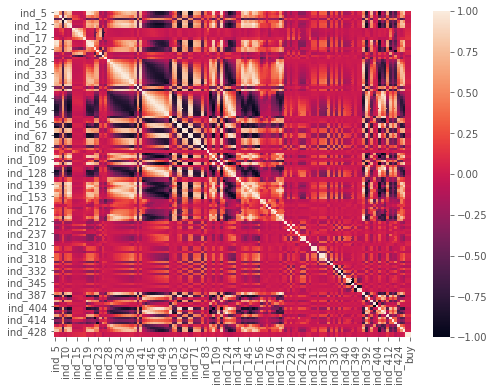

In [8]:
plt.figure(figsize=(8,6))
corrMatrix = dfCopy.corr()
sns.heatmap(corrMatrix);

- Korelasyon grafiği incelendiğinde, kümelenmeler göze çarpıyor. Bunların üzerinde PCA birleştirmesi uygulanabilir.

In [9]:
corrMatrix.loc[:,:] = np.tril(corrMatrix, k=-1)
corrMatrix.unstack().sort_values()

ind_403    ind_404   -1.000000
ind_102    ind_128   -0.999641
ind_122    ind_136   -0.996468
ind_67     ind_118   -0.990564
ind_102    ind_406   -0.986453
                        ...   
ind_124    ind_410    0.996143
ind_241    ind_243    0.997372
ind_316    ind_318    0.998663
90_target  buy        0.999721
ind_225    ind_234    0.999907
Length: 17689, dtype: float64

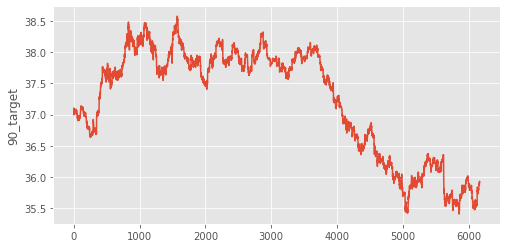

In [10]:
plt.figure(figsize=(8,4))
sns.lineplot(dfCopy[dfCopy['90_target'] != 0].index, np.abs(dfCopy[dfCopy['90_target'] != 0]['90_target']));

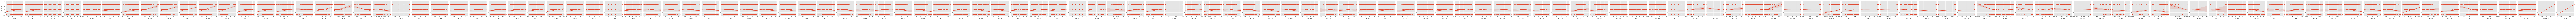

In [11]:
sns.pairplot(data=dfCopy, y_vars = ['90_target'], x_vars=dfCopy.select_dtypes(exclude=['object']).columns, kind='reg');

In [12]:
###histogram
#fig, ax = plt.subplots(1, len(dfCopy.select_dtypes(exclude=['object']).columns), figsize = (450, 4))
#for j, col in enumerate(df.select_dtypes(exclude=['object']).columns, 1):
#    sns.distplot(dfCopy[col], ax=ax[j])
#    plt.tight_layout()

In [13]:
dfCopy.corr()['90_target'].sort_values()

ind_324     -0.103707
ind_418     -0.096903
ind_330     -0.093811
ind_26      -0.086192
ind_128     -0.061283
               ...   
ind_412      0.124265
ind_17       0.129277
ind_18       0.140877
buy          0.999721
90_target    1.000000
Name: 90_target, Length: 133, dtype: float64

- Korelasyon ilişkileri çok düşük görünüyor.

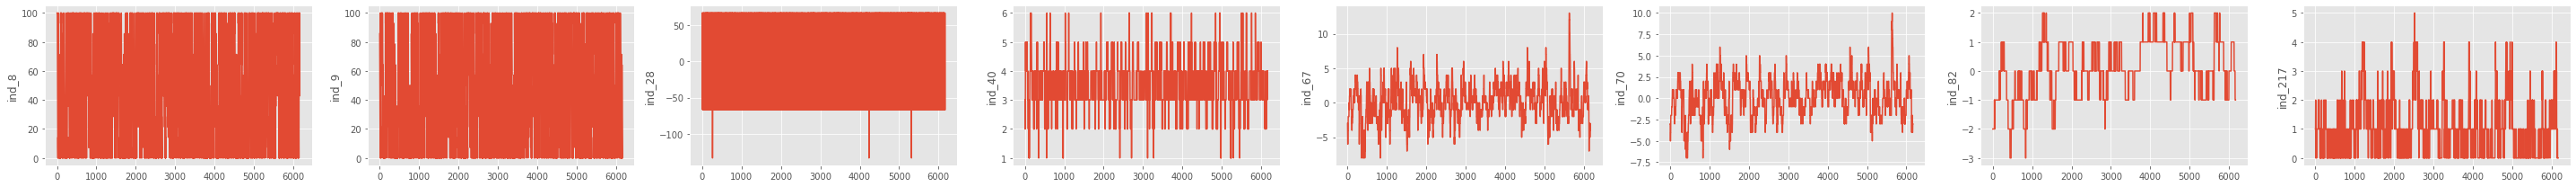

In [14]:
fig, ax = plt.subplots(1, 8, figsize = (40, 3))
for j, col in enumerate(['ind_8', 'ind_9', 'ind_28', 'ind_40', 'ind_67', 'ind_70', 'ind_82', 'ind_217'], 0):
    sns.lineplot(dfCopy.index,dfCopy[col],ax=ax[j])
    plt.tight_layout()

- Kategorik eğilim gösterenlerin line grafikleri yazdırıldı.
- İçerikte nasıl bir bilgi barındırdığı bilinmediği için kategorik dönüşüm yapılmadı.

### p-Value

In [15]:
p_value = pd.DataFrame()
for col in ['ind_8', 'ind_9', 'ind_28', 'ind_40', 'ind_67', 'ind_70', 'ind_82', 'ind_109', 'ind_217']:
    p_value.loc[col,'shapiro'] = (stats.shapiro((dfCopy[col]))[1])
    p_value.loc[col,'levene'] = (stats.levene(*(dfCopy[dfCopy[col] == val]['90_target'] for val in dfCopy[col].unique()))[1])
    p_value.loc[col,'anova'] = (stats.f_oneway(*(dfCopy[dfCopy[col] == val]['90_target'] for val in dfCopy[col].unique()))[1])
    
def color_negative(val):
    color = 'red' if val > 0.05 else 'black'
    return 'color: %s' % color
p_value.T.style.applymap(color_negative)

,ind_8,ind_9,ind_28,ind_40,ind_67,ind_70,ind_82,ind_109,ind_217
shapiro,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
levene,0.840878,0.964307,0.422285,0.140231,0.000006,0.000000,0.000000,0.123031,0.000370
anova,0.854198,0.972209,0.315329,0.181527,0.000000,0.000000,0.000000,0.124590,0.000001


- Kategorik eğilim gösterenlerin p değerleri incelendiğinde, anlamsız olanalar gözlemlendi.

# 4. PCA

> Sadece ind_109 kategorik olarak alınmıştır, PCA modeline dahil edilmedi.

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [17]:
dfPCA = dfCopy.copy()

df_drop = dfPCA[['buy','90_target','ind_109']]
df_pca = dfPCA.drop(['buy','90_target','ind_109'], axis=1)

- PCA uygulayabilmek için kategorik ve hedef değişkenler drop edildi.

In [18]:
df_pca.head(3)

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,ind_17,ind_18,ind_19,ind_20,ind_21,ind_22,ind_23,ind_25,ind_26,ind_27,ind_28,ind_29,ind_30,ind_31,ind_32,ind_33,ind_34,ind_35,ind_36,ind_37,ind_39,ind_40,ind_41,ind_42,ind_43,ind_44,ind_45,ind_46,ind_47,ind_48,ind_49,ind_50,ind_51,ind_52,ind_53,ind_56,ind_58,ind_61,ind_62,ind_65,ind_67,ind_70,ind_71,ind_74,ind_77,ind_82,ind_83,ind_88,ind_92,ind_102,ind_116,ind_118,ind_122,ind_124,ind_128,ind_130,ind_132,ind_134,ind_136,ind_139,ind_142,ind_145,ind_147,ind_150,ind_153,ind_156,ind_164,ind_168,ind_172,ind_176,ind_179,ind_181,ind_188,ind_194,ind_212,ind_217,ind_225,ind_228,ind_234,ind_237,ind_239,ind_241,ind_243,ind_309,ind_310,ind_311,ind_313,ind_315,ind_316,ind_318,ind_321,ind_324,ind_327,ind_330,ind_332,ind_334,ind_338,ind_340,ind_344,ind_345,ind_347,ind_349,ind_351,ind_352,ind_387,ind_392,ind_397,ind_399,ind_403,ind_404,ind_406,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,12.060000,9.1100,2,15,13,1,56,0.002690,-0.002670,0.000010,66.666667,93.692449,146.592674,150.505806,154.486989,158.009516,142.421114,142.023350,196.592517,184.819232,31.939605,3,30.752568,-5,-22,-22,-21,-23,-36,-40,-43,-71,-93,-18,24,19,-5,-4,10,9,-3,-3,8,8,8,-2,8,0.000517,20.198253,41.915016,-13,0.002523,-3,-25,-50,-83,-125,6,6,60.077747,60.975437,0.228496,81.390001,70.987678,67.107082,58.888561,-23.189737,-12.212712,8.133485,-39.935439,7.45,7.99,96.268657,96.268657,72.470277,1,0.039883,1.20086,0.00016,10.000000,0.000217,99.736250,1.200346,-0.000013,-1.524694,97.980028,1.179209,-0.756946,98.905563,1.190348,99.156641,-0.000062,12.056738,-0.157039,20.967742,-0.000091,1.197238,-0.319064,0.0,0.0,0.0,0.0,0.0,0.0,-3.731343,-32.587430,-26.386973,-0.003323,0.045130,-0.044678,-44,-23,-27,0.002371,2.0,-49.6,-54,1.0,0.498547,0.701906
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,11.326667,9.2225,0,11,11,1,63,0.002729,-0.003111,-0.000191,66.666667,76.694104,140.227205,156.903278,161.604303,169.720843,152.634492,149.634976,201.738617,191.985663,38.478501,3,36.812130,-6,-18,-24,-24,-25,-38,-43,-45,-73,-96,-15,20,20,-7,-5,10,9,-4,-3,8,8,8,-2,8,0.000401,17.870633,44.895122,-16,0.003019,-3,-28,-54,-88,-130,5,6,67.247491,64.078479,0.289838,84.135420,72.526560,67.956115,59.182324,-18.315789,-2.463107,20.369365,-32.824223,14.46,16.65,98.630137,98.630137,79.199436,1,0.039863,1.20070,0.00016,9.090909,0.000217,99.668519,1.200129,-0.000013,-1.523934,97.932319,1.179223,-0.756569,98.859627,1.190389,99.111914,-0.000062,11.971831,-0.156961,20.800000,-0.000091,1.197328,-0.318905,0.0,0.0,0.0,0.0,0.0,0.0,-1.369863,-38.115965,-26.085949,-0.000476,0.035314,-0.034961,-48,-16,-31,0.003074,0.8,-55.6,-60,1.0,0.537088,0.690833
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,10.973333,9.3125,5,15,9,-1,65,0.002780,-0.003530,-0.000375,66.666667,83.909974,117.755945,154.452274,164.015689,175.947530,160.181486,155.527932,205.238017,197.993551,28.917197,3,39.648290,-4,-11,-21,-22,-24,-36,-42,-44,-72,-95,-13,17,19,-9,-6,11,10,-4,-4,8,8,8,-2,8,0.000392,12.436570,45.087799,-15,0.003353,-1,-28,-54,-89,-132,5,3,72.441065,66.409997,0.188476,85.392211,73.224112,68.345231,59.318698,-9.289649,7.346277,24.829522,-24.435774,12.88,17.65,95.721078,95.721078,82.241467,1,0.039854,1.20054,0.00016,8.333333,0.000217,99.627319,1.199911,-0.000013,-1.523580,97.910664,1.179236,-0.756393,98.839991,1.190429,99.093554,-0.000062,11.888112,-0.156925,20.634921,-0.000091,1.197419,-0.318831,0.0,0.0,0.0,0.0,0.0,0.0,-4.278922,-40.428126,-23.250410,-0.000309,0.005860,-0.005802,-48,-10,-30,0.003561,2.7,-58.4,-60,1.0,0.615169,0.693040


#### PCA-1

In [19]:
pca_scaled = StandardScaler().fit_transform(df_pca)
pca = PCA(n_components = 8)

In [20]:
pca_fit = pca.fit(pca_scaled)
pca0 = pca.fit_transform(pca_scaled)

In [21]:
np.cumsum(np.array(pca_fit.explained_variance_ratio_))

array([0.37352167, 0.49551116, 0.55593151, 0.60059462, 0.63303501,
       0.66376631, 0.6909612 , 0.71126266])

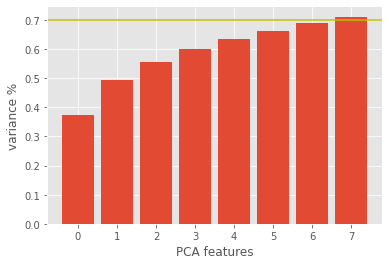

In [22]:
features = np.arange(pca_fit.n_components_)
plt.bar(features, np.cumsum(np.array(pca_fit.explained_variance_ratio_)))
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.axhline(0.7, color='y');

In [23]:
dfPCA0 = pd.DataFrame(pca0)
df_pca_1 = pd.concat([dfPCA0, df_drop], axis=1)

In [24]:
df_pca_1.head(3)

,0,1,2,3,4,5,6,7,buy,90_target,ind_109
0,-11.712635,-3.290396,6.574476,-1.385184,0.681875,-1.005465,-1.930301,-0.785500,3,36.997753,1
1,-12.782920,-2.881063,5.082777,-0.587903,1.587264,-1.516630,-1.921649,-0.887425,3,37.016198,1
2,-12.861184,-1.261886,3.579558,0.311959,1.907413,-1.475808,-1.079197,-1.118207,1,-37.024805,1


#### PCA-2

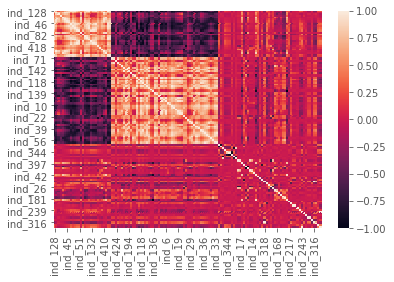

In [25]:
import scipy.cluster.hierarchy as sch

df_pca1 = df_pca.copy()

X = df_pca1.corr().values
d = sch.distance.pdist(X)
L = sch.linkage(d, method='complete')
ind = sch.fcluster(L, 0.5*d.max(), 'distance')
columns = [df_pca1.columns.tolist()[i] for i in list((np.argsort(ind)))]
df_pca1 = df_pca1.reindex(columns, axis=1)

sns.heatmap(df_pca1.corr());

- Yüksek korelasyon gösterenleri kümeleyerek, elle 3 farklı dataframe oluşturuldu. Gruplar arası ayrım, büyük grafikten tek tek okundu. 

In [26]:
pca_sample1 = df_pca1.loc[:,'ind_128':'ind_392']
pca_sample2 = df_pca1.loc[:,'ind_71':'ind_34']
pca_sample3 = df_pca1.loc[:,'ind_334':]

In [27]:
pca_sample1.head(3)

,ind_128,ind_124,ind_116,ind_40,ind_43,ind_44,ind_45,ind_46,ind_67,ind_47,ind_49,ind_50,ind_51,ind_52,ind_82,ind_58,ind_61,ind_48,ind_132,ind_130,ind_70,ind_418,ind_9,ind_414,ind_410,ind_407,ind_406,ind_392
0,-50,-25,-13,3,-22,-22,-21,-23,-3,-36,-43,-71,-93,-18,-2,-5,-4,-40,-125,-83,-3,-54,85.714286,2.0,-27,-23,-44,-32.587430
1,-54,-28,-16,3,-18,-24,-24,-25,-4,-38,-45,-73,-96,-15,-2,-7,-5,-43,-130,-88,-3,-60,78.571429,0.8,-31,-16,-48,-38.115965
2,-54,-28,-15,3,-11,-21,-22,-24,-4,-36,-44,-72,-95,-13,-2,-9,-6,-42,-132,-89,-4,-60,71.428571,2.7,-30,-10,-48,-40.428126


In [28]:
pca = PCA(n_components = 2)
pca_scaled1 = StandardScaler().fit_transform(pca_sample1)

pca1_fit = pca.fit(pca_scaled1)
pca1 = pca.fit_transform(pca_scaled1)

print(np.cumsum(np.array(pca1_fit.explained_variance_ratio_)))

dfPCA1 = pd.DataFrame(pca1)

[0.63733006 0.81349867]


In [29]:
pca = PCA(n_components = 2)
pca_scaled2 = StandardScaler().fit_transform(pca_sample2)

pca2_fit = pca.fit(pca_scaled2)
pca2 = pca.fit_transform(pca_scaled2)

print(np.cumsum(np.array(pca2_fit.explained_variance_ratio_)))

dfPCA2 = pd.DataFrame(pca2)

[0.56248753 0.7266775 ]


In [30]:
pca = PCA(n_components = 12)
pca_scaled3 = StandardScaler().fit_transform(pca_sample3)

pca3_fit = pca.fit(pca_scaled3)
pca3 = pca.fit_transform(pca_scaled3)

print(np.cumsum(np.array(pca3_fit.explained_variance_ratio_)))

dfPCA3 = pd.DataFrame(pca3)

[0.1222963  0.22251146 0.30208034 0.37840554 0.43527429 0.48722762
 0.53280001 0.57244851 0.60839311 0.6430323  0.67223559 0.70126918]


In [31]:
df_pca_2 = pd.concat([dfPCA1, dfPCA2, dfPCA3, df_drop], axis=1)

In [32]:
df_pca_2.head(3)

,0,1,0,1,0,1,2,3,4,5,6,7,8,9,10,11,buy,90_target,ind_109
0,-7.767736,-0.271308,-8.188663,-1.765204,2.996723,1.502770,-5.333602,-1.486285,3.730577,-0.771547,-0.711908,-0.179795,2.435742,-0.260617,0.878448,1.181684,3,36.997753,1
1,-8.302487,0.051586,-8.844959,-1.560716,2.852885,0.604475,-4.405491,-1.247115,5.028568,-0.791641,-1.399880,0.099164,2.568285,-0.500926,0.744496,1.095176,3,37.016198,1
2,-8.194042,0.709123,-9.069651,-0.981499,2.978366,-0.284947,-2.254546,-0.820679,3.973082,-0.987629,-1.794598,0.503614,2.772924,-0.613066,0.786225,1.507580,1,-37.024805,1


## Model

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
from statsmodels.tsa.stattools import acf

In [34]:
def regframe(X, Y, mod, idx):
    
    ##mae,mse,rmse,mape
    
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, shuffle = False)
    
    model = mod.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    df = pd.Series({'mae': mean_absolute_error(y_test, y_pred),
                    'mse': mse(y_test, y_pred),
                    'rmse': rmse(y_test, y_pred),
                    'mape': (np.mean(np.abs((y_test - y_pred) / y_test)) * 100)}, name = idx)
    return df

In [35]:
y = dfCopy['90_target']
X = dfCopy.drop(['90_target','buy'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model = LinearRegression().fit(x_train, y_train)
y_pred = model.predict(x_test)

### Varsayımlar

- Hata terimlerinin ortalaması 0 olması beklenir.

In [36]:
errors = y_test - y_pred
print("Ortalama Hata: {:.10f}".format(np.mean(errors)))

Ortalama Hata: -0.5289935015


- Modelin homoscedasticity davranış sergilemesi beklenir.

LeveneResult(statistic=898.5020333719505, pvalue=1.3373234532399154e-168)

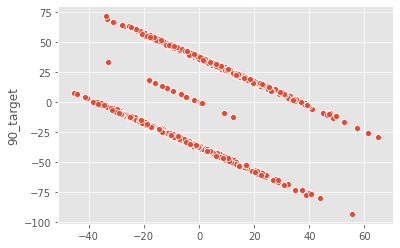

In [37]:
sns.scatterplot(x=y_pred, y=errors);
stats.levene(y_pred, errors)

- Hata terimleri birbiriyle ilişkisiz olmalıdır.


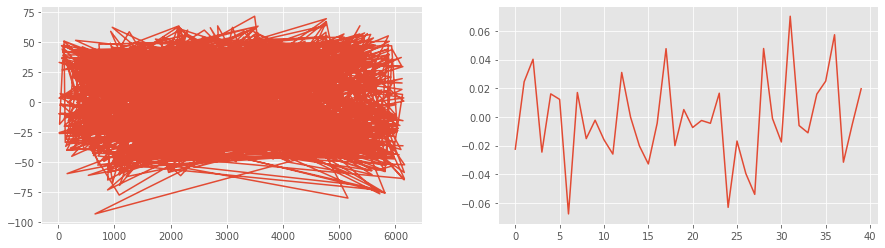

In [38]:
plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
plt.plot(errors)
plt.subplot(1, 2, 2)
plt.plot(acf(errors,fft=True)[1:]);

- Hata terimleri normal olarak dağılmalıdır.


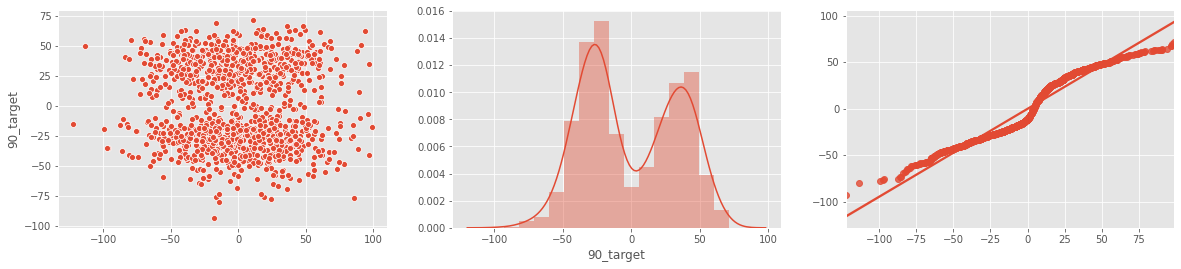

ShapiroResult(statistic=0.9384183287620544, pvalue=3.3670827586335957e-22)

In [39]:
randomNumber = np.random.normal(np.mean(errors), np.std(errors), len(errors))
plt.figure(figsize=(20,4))
plt.subplot(1, 3, 1)
sns.scatterplot(x=randomNumber, y=errors)
plt.subplot(1, 3, 2)
sns.distplot(errors)
plt.subplot(1, 3, 3)
sns.regplot(np.sort(randomNumber), np.sort(errors))
plt.show()
stats.shapiro(errors)

In [40]:
dfModel = pd.DataFrame(columns = ['mae', 'mse', 'rmse', 'mape'])

### 1. Linear Regresion

In [41]:
y = dfCopy['90_target']
X = dfCopy.drop(['90_target','buy'], axis=1)
model = LinearRegression()

dfModel = dfModel.append(regframe(X, y, model, 'linear'))

In [42]:
y = df_pca_1['90_target']
X = df_pca_1.drop(['90_target','buy'], axis=1)
model = LinearRegression()

dfModel = dfModel.append(regframe(X, y, model, 'linear_pca1'))

In [43]:
y = df_pca_2['90_target']
X = df_pca_2.drop(['90_target','buy'], axis=1)
model = LinearRegression()

dfModel = dfModel.append(regframe(X, y, model, 'linear_pca2'))

In [44]:
dfModel

,mae,mse,rmse,mape
linear,38.893658,2264.553246,47.587322,108.484255
linear_pca1,35.484532,1299.769372,36.052314,98.927066
linear_pca2,35.310419,1344.285874,36.664504,98.438317


In [45]:
# En iyi sonuç alınan parametre için düzeltme yapıldı.
dfModel = dfModel.drop(['linear','linear_pca2'])
dfModel = dfModel.rename(index={'linear_pca1': 'linear'})

### 2. Decision Tree

In [46]:
y = df_pca_1['90_target']
X = df_pca_1.drop(['90_target','buy'], axis=1)
model = DecisionTreeRegressor()

dfModel = dfModel.append(regframe(X, y, model, 'tree'))

In [47]:
dfModel

,mae,mse,rmse,mape
linear,35.484532,1299.769372,36.052314,98.927066
tree,34.134654,2424.476016,49.238968,95.188387


#### 2.1 Parametreler

In [48]:
dtree = DecisionTreeRegressor()
params = {'criterion': ['mse'], 'min_samples_split': [2, 10], 'max_depth': [2, 8, 32], 'min_samples_leaf': [10, 30]}

In [49]:
tscv = TimeSeriesSplit(n_splits=5)
gridcv_results = GridSearchCV(estimator = dtree, param_grid = params, cv = tscv, n_jobs = -1, verbose = 0).fit(X, y)
gridcv_results.best_params_

{'criterion': 'mse',
 'max_depth': 2,
 'min_samples_leaf': 10,
 'min_samples_split': 2}

In [50]:
y = df_pca_1['90_target']
X = df_pca_1.drop(['90_target','buy'], axis=1)

model = DecisionTreeRegressor(criterion='mse', min_samples_split=10, max_depth=15, min_samples_leaf=2)
dfModel = dfModel.append(regframe(X, y, model, 'tree_p1'))

In [51]:
dfModel

,mae,mse,rmse,mape
linear,35.484532,1299.769372,36.052314,98.927066
tree,34.134654,2424.476016,49.238968,95.188387
tree_p1,33.921495,1924.723880,43.871675,94.578087


In [52]:
# En iyi sonuç alınan parametre için düzeltme yapıldı.
dfModel = dfModel.drop(['tree'])
dfModel = dfModel.rename(index={'tree_p1': 'tree'})

### 3. Random Forest

In [53]:
y = df_pca_1['90_target']
X = df_pca_1.drop(['90_target','buy'], axis=1)
model = RandomForestRegressor()

dfModel = dfModel.append(regframe(X, y, model, 'forest'))

In [54]:
dfModel

,mae,mse,rmse,mape
linear,35.484532,1299.769372,36.052314,98.927066
tree,33.921495,1924.723880,43.871675,94.578087
forest,34.452846,1328.286331,36.445663,96.048443


### 3.1 Parametreler

In [55]:
rforest = RandomForestRegressor()
params = {'criterion': ['mse', 'mae'], 'n_estimators': [10,30]}

In [56]:
tscv = TimeSeriesSplit(n_splits=5)
gridcv_results = GridSearchCV(estimator = rforest, param_grid = params, cv = tscv, n_jobs = -1, verbose = 0).fit(X, y)
gridcv_results.best_params_

{'criterion': 'mae', 'n_estimators': 30}

In [57]:
model = RandomForestRegressor(criterion='mae', n_estimators=30)
dfModel = dfModel.append(regframe(X, y, model, 'forest_p1'))

In [58]:
dfModel

,mae,mse,rmse,mape
linear,35.484532,1299.769372,36.052314,98.927066
tree,33.921495,1924.723880,43.871675,94.578087
forest,34.452846,1328.286331,36.445663,96.048443
forest_p1,35.524978,1422.152526,37.711438,99.024311


In [59]:
# En iyi sonuç alınan parametre için düzeltme yapıldı.
dfModel = dfModel.drop(['forest_p1'])

### 4. Neural Network

In [60]:
y = df_pca_1['90_target']
X = df_pca_1.drop(['90_target','buy'], axis=1)
model = MLPRegressor(hidden_layer_sizes=(30,10))

dfModel = dfModel.append(regframe(X, y, model, 'neural'))

In [61]:
dfModel

,mae,mse,rmse,mape
linear,35.484532,1299.769372,36.052314,98.927066
tree,33.921495,1924.723880,43.871675,94.578087
forest,34.452846,1328.286331,36.445663,96.048443
neural,35.123921,1417.497651,37.649670,97.910814


### 4.1 Parametreler

In [62]:
neural = MLPRegressor()
params = {'alpha': [0.1,0.01,0.02,0.005],
          'hidden_layer_sizes': [(20,10), (50,10), (100,50)],
          'activation': ['relu','logistic']}

In [63]:
tscv = TimeSeriesSplit(n_splits=5)
gridcv_results = GridSearchCV(estimator = neural, param_grid = params, cv = tscv, n_jobs = -1, verbose = 0).fit(X, y)
gridcv_results.best_params_

{'activation': 'logistic', 'alpha': 0.1, 'hidden_layer_sizes': (20, 10)}

In [64]:
model = MLPRegressor(hidden_layer_sizes=(20,10),activation='logistic',alpha=0.1)
dfModel = dfModel.append(regframe(X, y, model, 'neural_p1'))
dfModel

,mae,mse,rmse,mape
linear,35.484532,1299.769372,36.052314,98.927066
tree,33.921495,1924.723880,43.871675,94.578087
forest,34.452846,1328.286331,36.445663,96.048443
neural,35.123921,1417.497651,37.649670,97.910814
neural_p1,35.761952,1348.718331,36.724901,99.683766


In [65]:
# En iyi sonuç alınan parametre için düzeltme yapıldı.
dfModel = dfModel.drop(['neural'])
dfModel = dfModel.rename(index={'neural_p1': 'neural'})

### 5. Support Vector Machine

In [66]:
y = df_pca_1['90_target']
X = df_pca_1.drop(['90_target','buy'], axis=1)
model = SVR(kernel = 'linear')

dfModel = dfModel.append(regframe(X, y, model, 'support'))

In [67]:
dfModel

,mae,mse,rmse,mape
linear,35.484532,1299.769372,36.052314,98.927066
tree,33.921495,1924.723880,43.871675,94.578087
forest,34.452846,1328.286331,36.445663,96.048443
neural,35.761952,1348.718331,36.724901,99.683766
support,35.392032,1767.567204,42.042445,98.710036


#### 5.1 Parametreler

In [68]:
support = SVR()
params = {'kernel': ['linear', 'rbf', 'poly'],
          'C': [0.1, 1, 10, 100]}

In [69]:
tscv = TimeSeriesSplit(n_splits=5)
gridcv_results = GridSearchCV(estimator = support, param_grid = params, cv = tscv, n_jobs = -1, verbose = 0).fit(X, y)
gridcv_results.best_params_

{'C': 0.1, 'kernel': 'linear'}

In [70]:
model = SVR(kernel='linear',C=0.1)
dfModel = dfModel.append(regframe(X, y, model, 'support_p1'))
dfModel

,mae,mse,rmse,mape
linear,35.484532,1299.769372,36.052314,98.927066
tree,33.921495,1924.723880,43.871675,94.578087
forest,34.452846,1328.286331,36.445663,96.048443
neural,35.761952,1348.718331,36.724901,99.683766
support,35.392032,1767.567204,42.042445,98.710036
support_p1,35.397707,1767.558838,42.042346,98.725633


In [71]:
# En iyi sonuç alınan parametre için düzeltme yapıldı.
dfModel = dfModel.drop(['support_p1'])

### 6. LightGBM

In [72]:
y = df_pca_1['90_target']
X = df_pca_1.drop(['90_target','buy'], axis=1)
model = LGBMRegressor()

dfModel = dfModel.append(regframe(X, y, model, 'lightgbm'))
dfModel

,mae,mse,rmse,mape
linear,35.484532,1299.769372,36.052314,98.927066
tree,33.921495,1924.723880,43.871675,94.578087
forest,34.452846,1328.286331,36.445663,96.048443
neural,35.761952,1348.718331,36.724901,99.683766
support,35.392032,1767.567204,42.042445,98.710036
lightgbm,34.478213,1356.914340,36.836318,96.129920


#### 6.1 Parametreler

In [73]:
light = LGBMRegressor()
params = {'learning_rate':[0.001,0.01,0.1,0.3],
          'n_estimators':[100,500,1000],
          'max_depth':[3,5,10],
          'subsample':[0.6,0.8,1.0]}

In [74]:
tscv = TimeSeriesSplit(n_splits=5)
gridcv_results = GridSearchCV(estimator = light, param_grid = params, cv = tscv, n_jobs = -1, verbose = 0).fit(X, y)
gridcv_results.best_params_

{'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.6}

In [75]:
model = LGBMRegressor(learning_rate=0.001,n_estimators=100,max_depth=3,subsample=0.6)
dfModel = dfModel.append(regframe(X, y, model, 'lightgbm_p1'))
dfModel

,mae,mse,rmse,mape
linear,35.484532,1299.769372,36.052314,98.927066
tree,33.921495,1924.723880,43.871675,94.578087
forest,34.452846,1328.286331,36.445663,96.048443
neural,35.761952,1348.718331,36.724901,99.683766
support,35.392032,1767.567204,42.042445,98.710036
lightgbm,34.478213,1356.914340,36.836318,96.129920
lightgbm_p1,35.806759,1297.456475,36.020223,99.828476


In [76]:
# En iyi sonuç alınan parametre için düzeltme yapıldı.
dfModel = dfModel.drop(['lightgbm'])
dfModel = dfModel.rename(index={'lightgbm_p1': 'lightgbm'})

### 7. KNN

In [77]:
y = df_pca_1['90_target']
X = df_pca_1.drop(['90_target','buy'], axis=1)
model = KNeighborsRegressor()

dfModel = dfModel.append(regframe(X, y, model, 'knn'))
dfModel

,mae,mse,rmse,mape
linear,35.484532,1299.769372,36.052314,98.927066
tree,33.921495,1924.723880,43.871675,94.578087
forest,34.452846,1328.286331,36.445663,96.048443
neural,35.761952,1348.718331,36.724901,99.683766
support,35.392032,1767.567204,42.042445,98.710036
lightgbm,35.806759,1297.456475,36.020223,99.828476
knn,34.223766,1575.026433,39.686603,95.414132


#### 7.1 Parametreler

In [78]:
knn = KNeighborsRegressor()
params = {'metric': ['euclidean', 'manhattan', 'chebyshev'], 'weights' : ['uniform', 'distance'], 'n_neighbors' : np.arange(1, 15)}

In [79]:
tscv = TimeSeriesSplit(n_splits=5)
gridcv_results = GridSearchCV(estimator = knn, param_grid = params, cv = tscv, n_jobs = -1, verbose = 0).fit(X, y)
gridcv_results.best_params_

{'metric': 'manhattan', 'n_neighbors': 14, 'weights': 'uniform'}

In [80]:
model = KNeighborsRegressor(metric='manhattan',n_neighbors=14,weights='uniform')
dfModel = dfModel.append(regframe(X, y, model, 'knn_p1'))
dfModel

,mae,mse,rmse,mape
linear,35.484532,1299.769372,36.052314,98.927066
tree,33.921495,1924.723880,43.871675,94.578087
forest,34.452846,1328.286331,36.445663,96.048443
neural,35.761952,1348.718331,36.724901,99.683766
support,35.392032,1767.567204,42.042445,98.710036
lightgbm,35.806759,1297.456475,36.020223,99.828476
knn,34.223766,1575.026433,39.686603,95.414132
knn_p1,34.533241,1401.501798,37.436637,96.287598


In [81]:
# En iyi sonuç alınan parametre için düzeltme yapıldı.
dfModel = dfModel.drop(['knn'])
dfModel = dfModel.rename(index={'knn_p1': 'knn'})

## SONUÇ

In [82]:
dfModel

,mae,mse,rmse,mape
linear,35.484532,1299.769372,36.052314,98.927066
tree,33.921495,1924.723880,43.871675,94.578087
forest,34.452846,1328.286331,36.445663,96.048443
neural,35.761952,1348.718331,36.724901,99.683766
support,35.392032,1767.567204,42.042445,98.710036
lightgbm,35.806759,1297.456475,36.020223,99.828476
knn,34.533241,1401.501798,37.436637,96.287598


### 8. Sınıflandırma

In [83]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

In [84]:
dfModel1 = pd.DataFrame(columns = ['mae', 'mse', 'rmse', 'mape'])

In [85]:
#MinMaxScaler
minmax_col = pd.DataFrame(MinMaxScaler().fit_transform(df_pca),
            columns=df_pca.columns)
dfMinMax = pd.concat([minmax_col, df_drop], axis=1)

In [86]:
dfMinMax.head(3)

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,ind_17,ind_18,ind_19,ind_20,ind_21,ind_22,ind_23,ind_25,ind_26,ind_27,ind_28,ind_29,ind_30,ind_31,ind_32,ind_33,ind_34,ind_35,ind_36,ind_37,ind_39,ind_40,ind_41,ind_42,ind_43,ind_44,ind_45,ind_46,ind_47,ind_48,ind_49,ind_50,ind_51,ind_52,ind_53,ind_56,ind_58,ind_61,ind_62,ind_65,ind_67,ind_70,ind_71,ind_74,ind_77,ind_82,ind_83,ind_88,ind_92,ind_102,ind_116,ind_118,ind_122,ind_124,ind_128,ind_130,ind_132,ind_134,ind_136,ind_139,ind_142,ind_145,ind_147,ind_150,ind_153,ind_156,ind_164,ind_168,ind_172,ind_176,ind_179,ind_181,ind_188,ind_194,ind_212,ind_217,ind_225,ind_228,ind_234,ind_237,ind_239,ind_241,ind_243,ind_309,ind_310,ind_311,ind_313,ind_315,ind_316,ind_318,ind_321,ind_324,ind_327,ind_330,ind_332,ind_334,ind_338,ind_340,ind_344,ind_345,ind_347,ind_349,ind_351,ind_352,ind_387,ind_392,ind_397,ind_399,ind_403,ind_404,ind_406,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,buy,90_target,ind_109
0,0.724638,0.714976,1.0,0.857143,0.571429,0.828604,0.971259,0.277947,0.303537,0.265448,0.235051,0.179402,0.652174,0.718563,0.788889,0.892744,0.443925,0.141716,0.786663,0.409832,1.0,0.781077,0.719145,0.625250,0.671936,0.692948,0.648437,0.653166,0.741258,0.759518,0.687309,0.4,0.722469,0.416667,0.333333,0.329032,0.358025,0.308642,0.225989,0.234375,0.282511,0.335484,0.330623,0.323529,0.626728,0.648276,0.288136,0.270270,0.686567,0.683333,0.238095,0.235294,0.673469,0.666667,0.690476,0.2,0.727273,0.611697,0.698681,0.833798,0.319767,0.782904,0.430380,0.263736,0.181818,0.272222,0.294118,0.626374,0.563291,0.642105,0.714191,0.669680,0.841742,0.852612,0.877109,0.877583,0.419535,0.481982,0.605670,0.296965,0.562016,0.654001,0.962687,0.962687,0.724703,0.2,0.241577,0.956983,0.237741,0.100052,0.084932,0.951981,0.957122,0.981941,0.207870,0.965460,0.954773,0.749123,0.979995,0.960004,0.973850,0.960129,0.120723,0.944473,0.210376,0.851232,0.960087,0.748810,1.0,1.0,0.0,1.0,0.0,0.0,0.962687,0.200778,0.366515,0.499814,0.765524,0.234476,0.205323,0.358025,0.278607,0.555085,0.007097,0.522158,0.712766,1.0,0.498547,0.787736,3,36.997753,1
1,0.748792,0.724638,1.0,0.785714,0.607143,0.854913,0.976297,0.127062,0.313808,0.279663,0.215299,0.184535,0.630435,0.694611,0.766667,0.892744,0.476636,0.143767,0.751886,0.390871,1.0,0.730082,0.709572,0.632615,0.680442,0.704576,0.658920,0.660565,0.746867,0.768796,0.724501,0.4,0.770980,0.406250,0.363636,0.316129,0.339506,0.296296,0.214689,0.218750,0.273543,0.329032,0.322493,0.345588,0.608295,0.655172,0.254237,0.243243,0.686567,0.683333,0.190476,0.235294,0.673469,0.666667,0.690476,0.2,0.727273,0.604483,0.678836,0.847906,0.302326,0.813799,0.430380,0.247253,0.166008,0.258333,0.283224,0.620879,0.563291,0.729366,0.766198,0.688983,0.870653,0.877258,0.896948,0.891969,0.456847,0.538834,0.667363,0.339032,0.619180,0.750782,0.986301,0.986301,0.791994,0.2,0.241457,0.956855,0.237741,0.090956,0.084932,0.951335,0.956949,0.981941,0.208265,0.964990,0.954784,0.749248,0.979540,0.960037,0.973411,0.960129,0.119873,0.944500,0.208693,0.851232,0.960159,0.748935,1.0,1.0,0.0,1.0,0.0,0.0,0.986301,0.178270,0.368766,0.591050,0.716052,0.283948,0.190114,0.401235,0.258706,0.570000,0.002839,0.464355,0.680851,1.0,0.537088,0.773630,3,37.016198,1
2,0.777778,0.748792,1.0,0.714286,0.642857,0.866807,0.978490,0.094075,0.308102,0.281404,0.205782,0.188641,0.684783,0.718563,0.744444,0.886435,0.485981,0.146513,0.718925,0.373539,1.0,0.751730,0.675775,0.629793,0.683324,0.710758,0.666667,0.666294,0.750682,0.776575,0.670118,0.4,0.793685,0.427083,0.416667,0.335484,0.351852,0.302469,0.225989,0.223958,0.278027,0.332258,0.325203,0.360294,0.594470,0.648276,0.220339,0.216216,0.701493,0.700000,0.190476,0.176471,0.673469,0.666667,0.690476,0.2,0.727273,0.603923,0.632506,0.848818,0.308140,0.834614,0.455696,0.247253,0.166008,0.255556,0.278867,0.620879,0.544304,0.792576,0.805274,0.657087,0.883888,0.888430,0.906041,0.898647,0.525945,0.596035,0.689852,0.388653,0.606295,0.761958,0.957211,0.957211,0.822415,0

In [90]:
def confusion(X, Y, mod, mix=False):
   
    ##confusion matrix, precision, recall, fscore
    
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, shuffle = mix, random_state = 42)

    model = mod.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    y_prob = model.predict_proba(x_test)[:,1]
    
    dfMatrix = pd.concat([pd.DataFrame(confusion_matrix(y_test, y_pred), columns=['pred_0','pred_1','pred_2']), 
               pd.DataFrame(precision_recall_fscore_support(y_test, y_pred), index=['precision', 'recall', 'f1-score', 'support']).T],
               ignore_index=False, axis=1)
    print('test_score:', '%.5f' % model.score(x_test, y_test),'|' , 'train_score:', '%.5f' % model.score(x_train, y_train) )
    return dfMatrix

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

In [93]:
y = dfMinMax['buy']
X = dfMinMax.drop(['90_target','buy'], axis=1)

model = MultinomialNB()

confusion(X, y, model)

test_score: 0.50648 | train_score: 0.58099


,pred_0,pred_1,pred_2,precision,recall,f1-score,support
0,529,9,90,0.510125,0.842357,0.635435,628.0
1,0,0,0,0.000000,0.000000,0.000000,0.0
2,508,2,96,0.516129,0.158416,0.242424,606.0
